In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures

In [3]:
raw_data = pd.read_csv("kc_house_data.csv")
raw_data.drop(["id","zipcode","lat","long"], axis=1,inplace=True)

In [4]:
raw_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,1800,7503


In [5]:
raw_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [6]:
raw_data.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [7]:
raw_data.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [8]:
raw_data.price.value_counts()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64

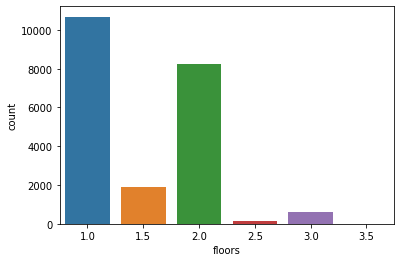

In [9]:
sb.countplot(x='floors',data=raw_data)

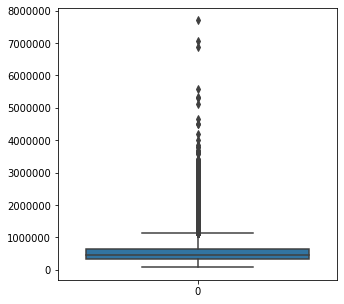

In [10]:
sb.boxplot(data=raw_data['price'])
fig=plt.gcf()
fig.set_size_inches(5,5)

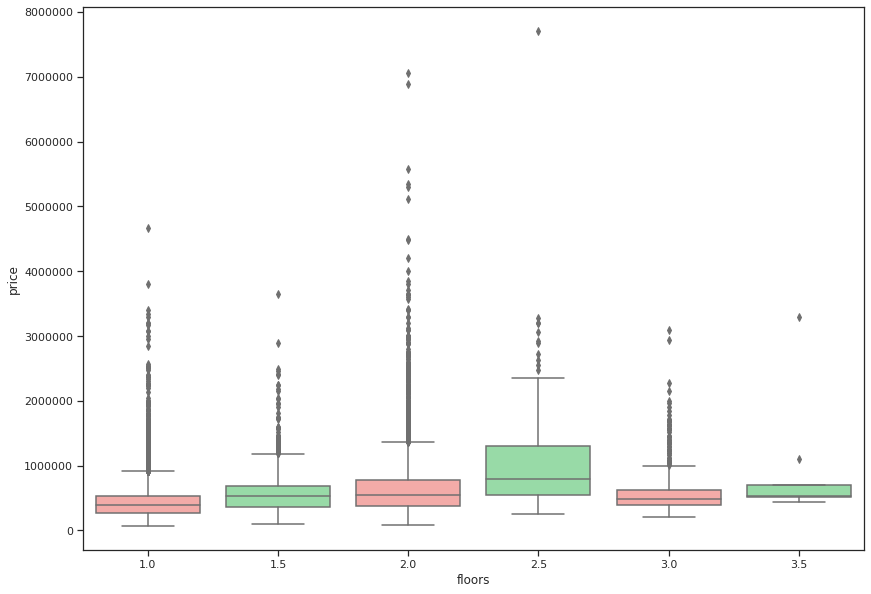

In [11]:
sb.set(style='ticks',palette='pastel')
fig, ax = plt.subplots(figsize=(14,10)) 
sb.boxplot(x='floors',y='price',palette=["r", "g"], data=raw_data,ax=ax)

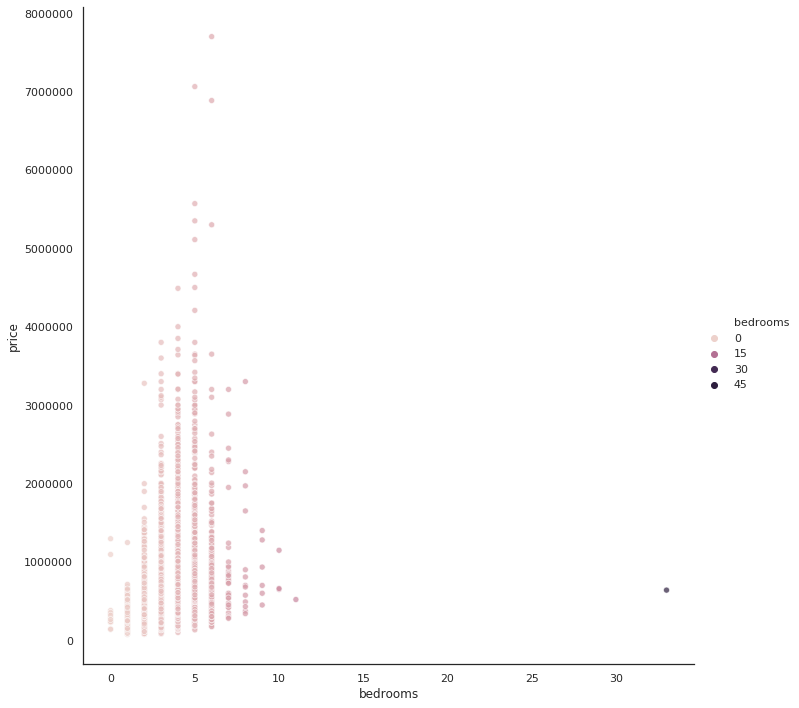

In [12]:
sb.set(style='white')
sb.relplot(x='bedrooms',y='price',hue='bedrooms',alpha=0.7,height=10,data=raw_data)

In [13]:
# remove outliers
raw_data=raw_data[raw_data['bedrooms']!=33]

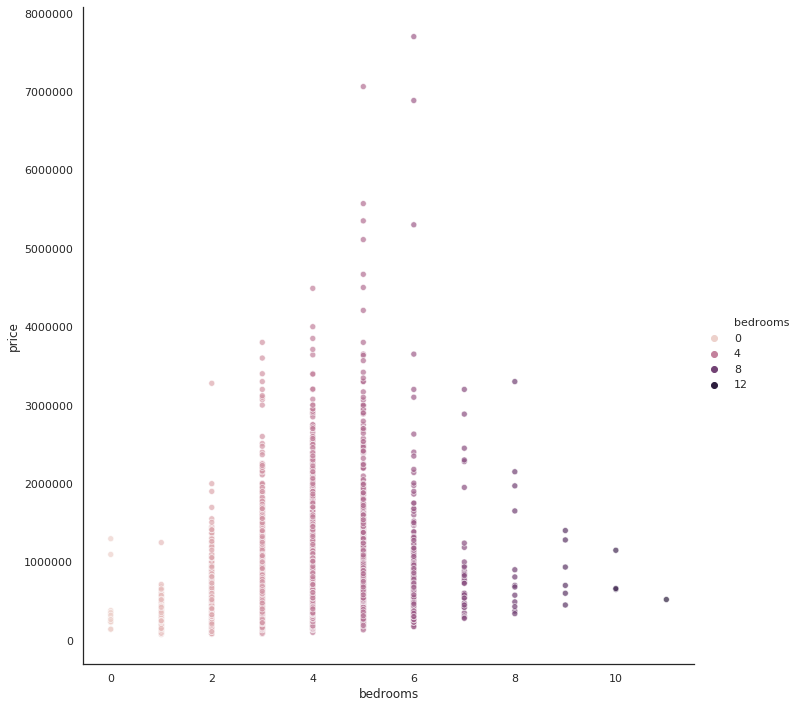

In [14]:
sb.set(style='white')
sb.relplot(x='bedrooms',y='price',hue='bedrooms',alpha=0.7,height=10,data=raw_data)
#after removed outliers

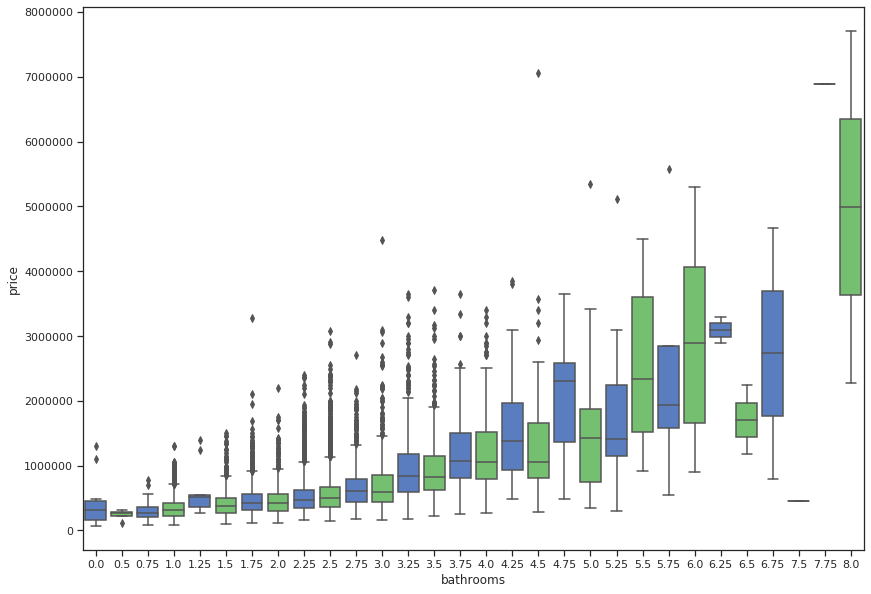

In [15]:
#boxplot between bathrooms and price
sb.set(style='ticks',palette='muted')
fig,ax=plt.subplots(figsize=(14,10))
sb.boxplot(x='bathrooms',y='price',palette=["b", "g"],data=raw_data,ax=ax)

In [16]:
raw_data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.315445,0.525147,0.702047,0.089664,0.256811,0.266371,0.397299,0.036336,0.667447,0.605591,0.323812,0.054023,0.126437,0.585404,0.082451
bedrooms,0.315445,1.000000,0.529159,0.591467,0.032807,0.181085,-0.006611,0.081930,0.025478,0.366502,0.490617,0.309490,0.159167,0.019617,0.402626,0.030402
bathrooms,0.525147,0.529159,1.000000,0.754663,0.087735,0.500645,0.063742,0.187732,-0.124946,0.664979,0.685360,0.283789,0.506012,0.050735,0.568628,0.087170
sqft_living,0.702047,0.591467,0.754663,1.000000,0.172822,0.353937,0.103816,0.284606,-0.058704,0.762701,0.876645,0.435065,0.318037,0.055358,0.756419,0.183280
sqft_lot,0.089664,0.032807,0.087735,0.172822,1.000000,-0.005210,0.021603,0.074707,-0.008935,0.113616,0.183505,0.015293,0.053073,0.007641,0.144602,0.718556
floors,0.256811,0.181085,0.500645,0.353937,-0.005210,1.000000,0.023695,0.029432,-0.263706,0.458171,0.523881,-0.245684,0.489302,0.006330,0.279856,-0.011282
waterfront,0.266371,-0.006611,0.063742,0.103816,0.021603,0.023695,1.000000,0.401857,0.016665,0.082773,0.072072,0.080591,-0.026165,0.092884,0.086461,0.030702
view,0.397299,0.081930,0.187732,0.284606,0.074707,0.029432,0.401857,1.000000,0.046031,0.251315,0.167639,0.276959,-0.053452,0.103915,0.280432,0.072571
condition,0.036336,0.025478,-0.124946,-0.058704,-0.008935,-0.263706,0.016665,0.046031,1.000000,-0.144632,-0.158129,0.174057,-0.361380,-0.060602,-0.092731,-0.003373
grade,0.667447,0.366502,0.664979,0.762701,0.113616,0.458171,0.082773,0.251315,-0.144632,1.000000,0.755920,0.168412,0.446952,0.014409,0.713198,0.119241


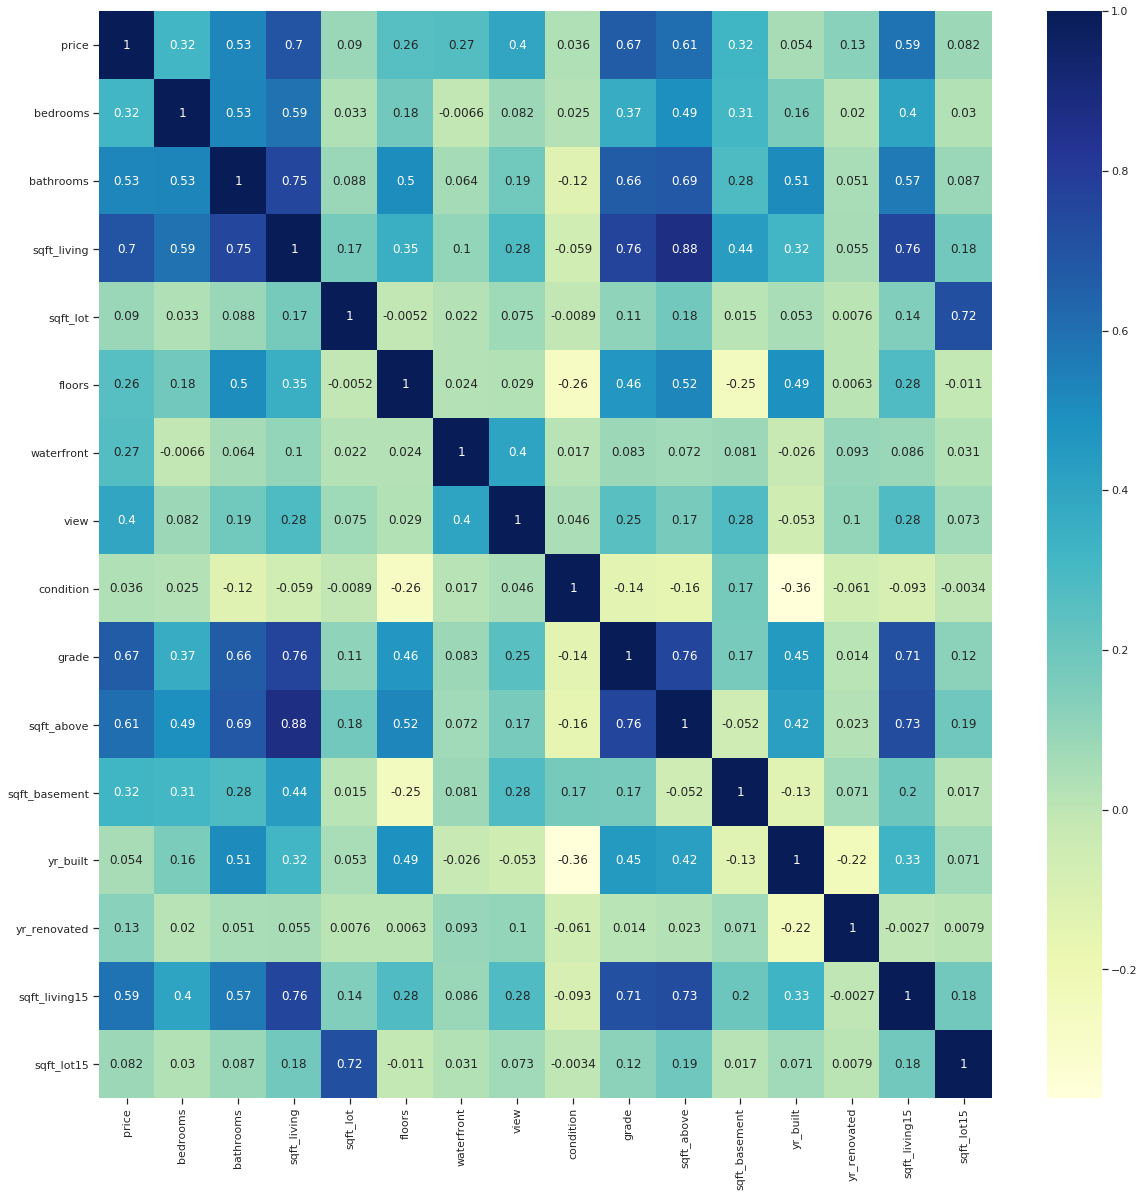

In [17]:
#heatmap for all the required features for correlation
raw_data_hm=raw_data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
     'sqft_living15', 'sqft_lot15']]
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(raw_data.corr(),cmap = 'YlGnBu',annot=True,ax=ax)

bedrooms
0     AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

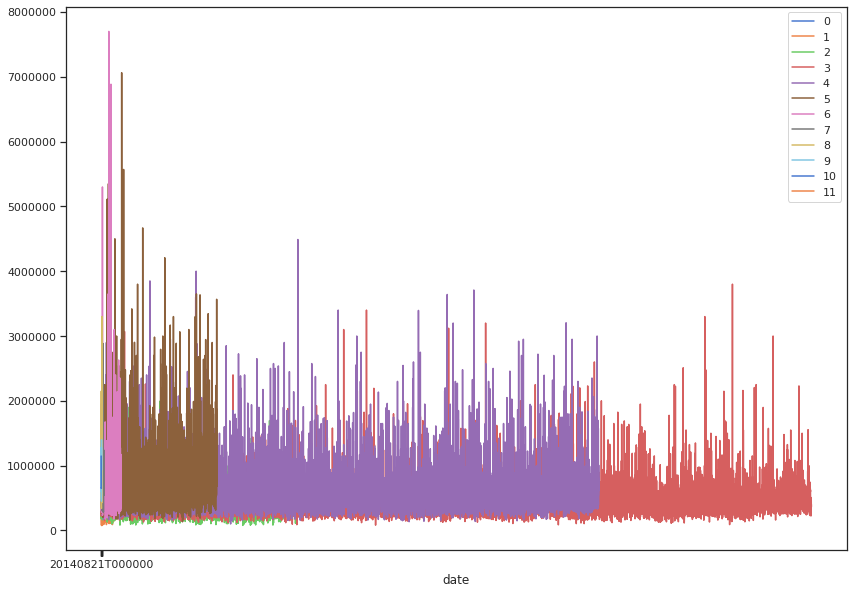

In [18]:
#graph for dates,price and bedrooms
fig,ax=plt.subplots(figsize=(14,10))
raw_data.set_index('date').groupby('bedrooms')['price'].plot(legend=True)

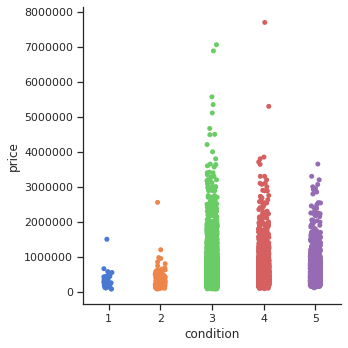

In [19]:
sb.catplot(x='condition',y='price',data=raw_data)

[(0, 250000)]

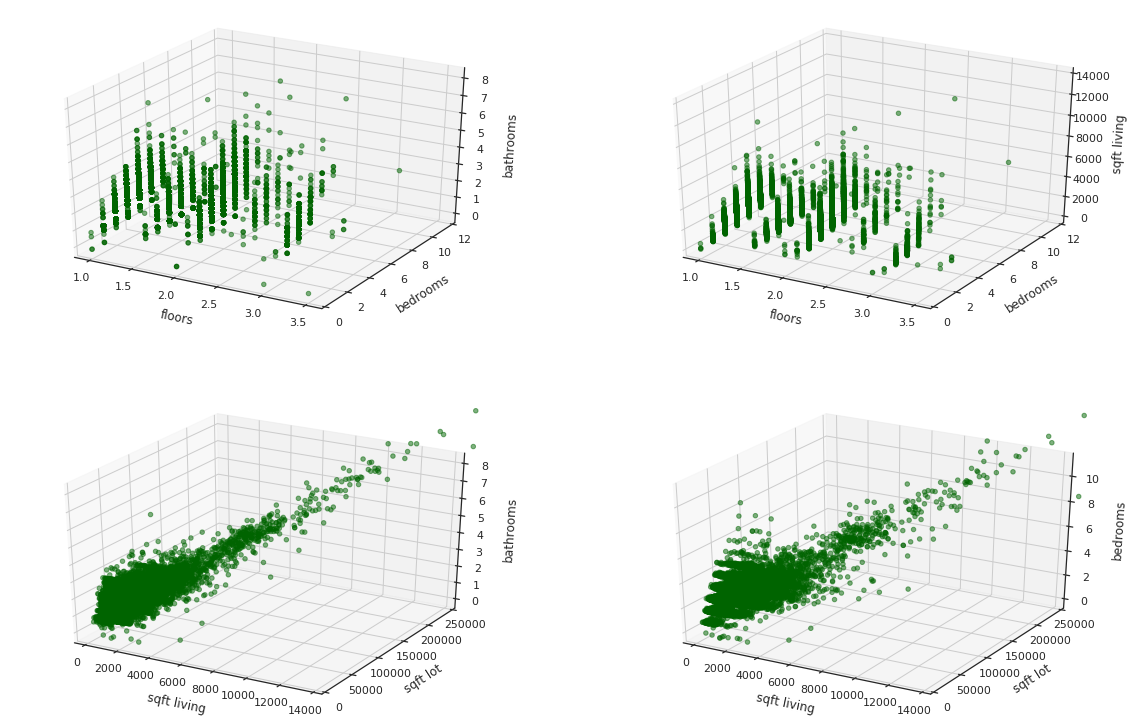

In [20]:
from mpl_toolkits import mplot3d

fig=plt.figure(figsize=(20,13))
ax=fig.add_subplot(2,2,1,projection='3d')
ax.scatter(raw_data['floors'],raw_data['bedrooms'],raw_data['bathrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nfloors',ylabel='\nbedrooms',zlabel='\nbathrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2,projection='3d')
ax.scatter(raw_data['floors'],raw_data['bedrooms'],raw_data['sqft_living'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nfloors',ylabel='\nbedrooms',zlabel='\nsqft living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3,projection='3d')
ax.scatter(raw_data['sqft_living'],raw_data['sqft_lot'],raw_data['bathrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft living',ylabel='\nsqft lot',zlabel='\nbathrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4,projection='3d')
ax.scatter(raw_data['sqft_living'],raw_data['sqft_lot'],raw_data['bedrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft living',ylabel='\nsqft lot',zlabel='\nbedrooms')
ax.set(ylim=[0,250000])

In [21]:
raw_data['bathrooms']

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21612, dtype: float64

In [22]:
raw_data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [23]:
raw_data_f= raw_data.dropna()

In [24]:
raw_data_f.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
X = raw_data_f.drop(["price","date"],axis=1).values #input_data
y = raw_data_f["price"].values #output
print("input shape: ",X.shape)
print("output shape: ",y.shape)

input shape:  (21610, 15)
output shape:  (21610,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=241)

In [27]:
reg_model = linear_model.LinearRegression()

In [28]:
reg_model.fit(X_train, y_train)
y_predicted = reg_model.predict(X_test)

In [29]:
prediction = pd.DataFrame({'prediction':y_predicted,'Actual':y_test})

In [30]:
print(reg_model.score(X_test,y_test)*100)

65.47586794800722


In [31]:
X = raw_data_f.drop(["price"],axis=1).values #input_data
y = raw_data_f["price"].values #output
print("input shape: ",X.shape)
print("output shape: ",y.shape)
X, y = make_regression(n_samples=200, random_state=0, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=241)
regr = MLPRegressor(hidden_layer_sizes=512, solver='adam',
                    max_iter=200, activation='relu',
                    random_state=1,learning_rate='constant',
                    learning_rate_init=0.01,
                    batch_size=2)
regr.fit(X_train, y_train)

input shape:  (21610, 16)
output shape:  (21610,)


MLPRegressor(activation='relu', alpha=0.0001, batch_size=2, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=512, learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [32]:
y_predicted = regr.predict(X_test)
prediction = pd.DataFrame({'prediction':y_predicted,'Actual':y_test})
print(regr.score(X_test,y_test)*100)
print('Mean Squared Error: %2f'
     % mean_squared_error(y_test,y_predicted))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predicted)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))

73.49689368448853
Mean Squared Error: 11909.560039
Root Mean Squared Error: 109.13093071750428
Mean Absolute Error: 88.17634216211104


In [33]:
X = raw_data_f.drop(["price"],axis=1).values #input_data
y = raw_data_f["price"].values #output
print("input shape: ",X.shape)
print("output shape: ",y.shape)
X, y = make_regression(n_samples=200, random_state=0, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=241)
reg = GradientBoostingRegressor(random_state=241, max_depth=3, learning_rate=0.1, n_estimators=100)
reg.fit(X_train, y_train)

input shape:  (21610, 16)
output shape:  (21610,)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=241, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
y_predicted = reg.predict(X_test)
prediction = pd.DataFrame({'prediction':y_predicted,'Actual':y_test})
print(reg.score(X_test,y_test)*100)
print('Mean Squared Error: %2f'
     % mean_squared_error(y_test,y_predicted))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predicted)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))

59.061384581894096
Mean Squared Error: 18396.368050
Root Mean Squared Error: 135.6332114562134
Mean Absolute Error: 106.6777896599167


In [35]:
import tensorflow as tf
import time
import math

In [36]:
X = raw_data_f.drop(["price","date"],axis=1).values #input_data
y = raw_data_f["price"].values #output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("input shape: ",X_train.shape)
print("output shape: ",y_train.shape)

input shape:  (15127, 15)
output shape:  (15127,)


In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(124,input_shape=(15,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [38]:
model.compile(loss='mean_squared_error',
        optimizer=tf.keras.optimizers.Adam(0.1),
        metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 124)               1984      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 125       
Total params: 2,109
Trainable params: 2,109
Non-trainable params: 0
_________________________________________________________________


In [40]:
hist = model.fit(X_train, y_train, epochs = 1000, verbose=0)

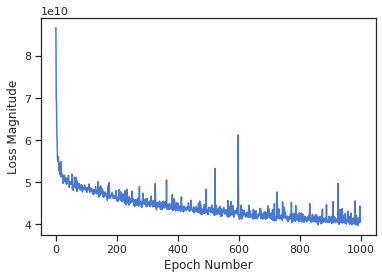

In [41]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['loss'])

In [50]:
X = raw_data_f.drop(["price","date"],axis=1).values #input_data
y = raw_data_f["price"].values #output
print("input shape: ",X.shape)
print("output shape: ",y.shape)

input shape:  (21610, 15)
output shape:  (21610,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=241)

In [52]:
import time

polyfeat=PolynomialFeatures(degree=2)

start_time=time.time()

xtrain_poly=polyfeat.fit_transform(X_train)

xtest_poly=polyfeat.fit_transform(X_test)

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,y_train)

end_time=time.time()

print("---%s seconds ---" % (end_time - start_time))

polypred=poly.predict(xtest_poly)

---0.40554285049438477 seconds ---


In [53]:
print('PolynomialRegressionRebuild')
mean_squared_error=metrics.mean_squared_error(y_test,polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, y_train), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, y_test), 3))

PolynomialRegressionRebuild
Mean Squared Error (MSE)  192074.12
R-squared (training)  0.757
R-squared (testing)  0.717
